# DATA SCIENCE INTERNSHIP AT LETS GROW MORE

# ADVANCE LEVEL 3 : Develop A Neural Network That Can Read Handwriting:

### Import required libraries:

In [114]:
import tensorflow as tsf
from numpy import unique,argmax
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np


### Load the dataset

In [115]:
mnist = tsf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

### Reshaping the training and testing dataset

In [116]:
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))

### Normalize the value of pixels in images

In [117]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

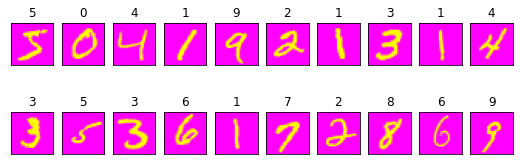

In [86]:
fig = plt.figure(figsize = (9,3))
for i in range(20):
    ax = fig.add_subplot(2,10,i+1,xticks =[],yticks = [])
    ax.imshow(np.squeeze(x_train[i]),cmap = 'spring')
    ax.set_title(y_train[i])

### Determine the shape of input image

In [118]:
img_shape = x_train.shape[1:]
img_shape

(28, 28, 1)

### Define the model

In [119]:
import tensorflow as tfs
model = tsf.keras.models.Sequential([tsf.keras.layers.Flatten(input_shape=(28, 28)),

  tsf.keras.layers.Dense(128, activation='relu'),

  tsf.keras.layers.Dropout(0.2),

  tsf.keras.layers.Dense(10)])

In [120]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [121]:
!pip install graphviz

In [122]:
!pip install pydot 

In [123]:
!pip install pydot

In [124]:
!pip install keras

In [131]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.jpg', show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [132]:
predictions = model(x_train[:1]).numpy()

predictions

array([[-0.55359197,  0.4725436 , -0.7809154 , -0.4977185 ,  0.19754425,
         0.46919107,  0.46424603, -0.3603804 , -0.10252157, -0.40273482]],
      dtype=float32)

In [133]:
tsf.nn.softmax(predictions).numpy()


array([[0.05794452, 0.1616804 , 0.04616226, 0.06127423, 0.12280799,
        0.16113926, 0.16034439, 0.07029478, 0.09097242, 0.06737966]],
      dtype=float32)

### Compiling The Model¶


In [144]:
loss_fn = tsf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()
model.compile(optimizer='adam',loss=loss_fn, metrics=['accuracy'])

### Train the model

In [145]:
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 0.0299 - accuracy: 0.9900
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0285 - accuracy: 0.9903
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0276 - accuracy: 0.9901
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0260 - accuracy: 0.9910
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0279 - accuracy: 0.9907


### model evaluation

In [ ]:
model.evaluate(x_test,  y_test, verbose=5)


### Probablity of the model¶


In [ ]:
probability_model = tsf.keras.Sequential([ model, tsf.keras.layers.Softmax() ])
probability_model(x_test[:5])

### Testing the model¶


In [ ]:
img = x_train[3]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [ ]:
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted is : {}".format(argmax(p)))